## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results, how = 'inner', on = ['Mouse ID'])
# Display the data table for preview
display(merged_df)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
unique_mice = merged_df["Mouse ID"].unique()
unique_mice_count = len(unique_mice)
display(unique_mice_count)

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_list = []
for y in range(len(unique_mice)):
    mouse_df = merged_df[merged_df["Mouse ID"] == str(unique_mice[y])]
    
    count = mouse_df.duplicated(subset='Timepoint').sum()
                            
    if (int(count) > int(1)):                            
        dup_mouse_list.append(str(unique_mice[y]))
    else:
        pass
display(dup_mouse_list)
        

['g989']

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = 'last', inplace = True)
display(merged_df)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
unique_mice = merged_df["Mouse ID"].unique()
unique_mice_count = len(unique_mice)
display(unique_mice_count)

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_id_list = []
sex_list = []
regimen_list = []
mean_list = []
median_list = []
variance_list = []
std_list = []
sem_list = []
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
for x in range(len(unique_mice)):
    staging_df = merged_df[merged_df["Mouse ID"] == str(unique_mice[x])]
    regimen = staging_df["Drug Regimen"].iat[0]
    sex = staging_df["Sex"].iat[0]
    
    # mean, median, variance, standard deviation, and SEM of the tumor volume.
    mean = staging_df["Tumor Volume (mm3)"].mean()
    median = staging_df["Tumor Volume (mm3)"].median()
    variance = staging_df["Tumor Volume (mm3)"].var()
    standard_dev = staging_df["Tumor Volume (mm3)"].std()
    sem = staging_df["Tumor Volume (mm3)"].sem(ddof=1)
    
    # Assemble the resulting series into a single summary dataframe.
    mouse_id_list.append(str(unique_mice[x]))
    sex_list.append(sex)
    regimen_list.append(regimen)
    mean_list.append(mean)
    median_list.append(median)
    variance_list.append(variance)
    std_list.append(standard_dev)
    sem_list.append(sem)

columns = ["Regimen", "Mouse ID", "Sex", "Mean", "Median", "Varience", "STD", "SEM"]
statistics_df = pd.DataFrame(list(zip(regimen_list, mouse_id_list, sex_list,
                                      mean_list, median_list,
                                      variance_list, std_list,
                                      sem_list)), columns = columns)

display(statistics_df)
                        





,Regimen,Mouse ID,Sex,Mean,Median,Varience,STD,SEM
0,Ramicane,k403,Male,32.358859,33.231153,46.589911,6.825680,2.158470
1,Capomulin,s185,Female,34.559143,35.408408,52.636440,7.255097,2.294263
2,Capomulin,x401,Female,36.182040,36.341478,39.519766,6.286475,1.987958
3,Capomulin,m601,Male,34.847470,33.687244,25.845598,5.083857,1.607657
4,Ramicane,g791,Male,37.489237,37.869979,35.295241,5.940980,1.878703
...,...,...,...,...,...,...,...,...
244,Stelasyn,z314,Female,45.467356,45.467356,0.436843,0.660941,0.467356
245,Propriva,z435,Female,46.942214,47.115980,3.464898,1.861424,1.074693
246,Infubinol,z581,Female,53.979584,53.062175,29.827123,5.461421,1.727053
247,Naftisol,z795,Female,54.880317,55.613879,53.416711,7.308674,2.311206


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

unique_regimen = statistics_df["Regimen"].unique()

regimen_list = []
mean_list = []
median_list = []
variance_list = []
std_list = []
sem_list = []
measurement_list = []

for z in range(len(unique_regimen)):
    regimen = str(unique_regimen[z])
    staging_df = merged_df[merged_df["Drug Regimen"] == str(unique_regimen[z])]
                  
    # mean, median, variance, standard deviation, and SEM of the tumor volume.
    mean = staging_df["Tumor Volume (mm3)"].mean()
    median = staging_df["Tumor Volume (mm3)"].median()
    variance = staging_df["Tumor Volume (mm3)"].var()
    standard_dev = staging_df["Tumor Volume (mm3)"].std()
    sem = staging_df["Tumor Volume (mm3)"].sem(ddof=1)
    measurement = len(staging_df)
    
    # Assemble the resulting series into a single summary dataframe.

    regimen_list.append(regimen)
    mean_list.append(mean)
    median_list.append(median)
    variance_list.append(variance)
    std_list.append(standard_dev)
    sem_list.append(sem)
    measurement_list.append(measurement)

columns = ["Regimen", "Mean", "Median", "Varience", "STD", "SEM", "Measurements"]
statistics_df = pd.DataFrame(list(zip(regimen_list,
                                      mean_list, median_list,
                                      variance_list, std_list,
                                      sem_list, measurement_list)), columns = columns)

display(statistics_df)
    
    

# Using the aggregation method, produce the same summary statistics in a single line


,Regimen,Mean,Median,Varience,STD,SEM,Measurements
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398,182
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
8,Propriva,52.382993,50.783528,43.220205,6.574208,0.526358,156
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of measurements'}, xlabel='Regimen'>

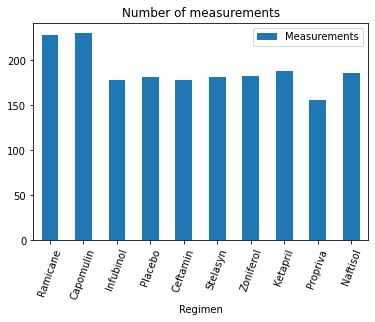

In [16]:
bar_chart = statistics_df.plot.bar(x="Regimen", y="Measurements", rot=70, title="Number of measurements");

display(bar_chart)

([<matplotlib.axis.XTick at 0x1fed03a9f70>,
 [Text(0, 0, 'Ramicane'),
  Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Placebo'),
  Text(4, 0, 'Ceftamin'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Ketapril'),
  Text(8, 0, 'Propriva'),
  Text(9, 0, 'Naftisol')])

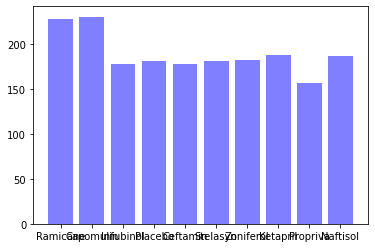

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measurements = statistics_df["Measurements"]
x_axis = np.arange(len(measurements))
plt.bar(x_axis, measurements, color='b', alpha=.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, statistics_df["Regimen"])
#plt.rcParams["figure.figsize"] = (10,40)


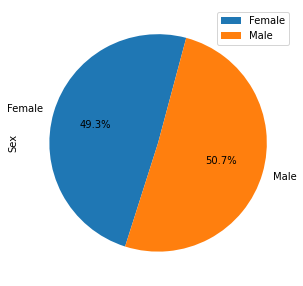

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

female_df = merged_df[merged_df["Sex"] == "Female"]
female_len = len(female_df)

male_df = merged_df[merged_df["Sex"] == "Male"]
male_len = len(male_df)

# The values of each section of the pie chart

data = {'Sex': [female_len,male_len]}
gender_df = pd.DataFrame(data,columns=['Sex'],index = ['Female','Male'])

gender_df.plot.pie(figsize=(5, 5),autopct='%1.1f%%', startangle=75, subplots=True)
plt.show()

([<matplotlib.patches.Wedge at 0x2335b38d580>,
 [Text(-0.7427374861631707, -0.8516108422560236, 'Female'),
  Text(0.7427374861631708, 0.8516108422560235, 'Male')],
 [Text(-0.4140925807812367, -0.47479188550557067, '49.4%'),
  Text(0.4140925807812368, 0.47479188550557055, '50.6%')])

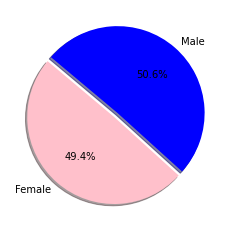

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

female_df = merged_df[merged_df["Sex"] == "Female"]
female_len = len(female_df)

male_df = merged_df[merged_df["Sex"] == "Male"]
male_len = len(male_df)

# The values of each section of the pie chart
sizes = [female_len, male_len]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.03, 0.03)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = []
mouse_id_list = []
final_tumor_list = []
timepoint_list = []


regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
for a in range(len(regimen_list)):
    regimen = str(regimen_list[a])
    staging_df = merged_df[merged_df["Drug Regimen"] == str(regimen)]
    
    unique_mouse = staging_df["Mouse ID"].unique()
    for b in range(len(unique_mouse)):
        mouse_id = unique_mouse[b]
        mouse_df = staging_df[staging_df["Mouse ID"] == str(mouse_id)]
        mouse_df = mouse_df.sort_values(by='Timepoint')
        
#         final_tumor_point = mouse_df["Timepoint"].idxmax(axis=0, skipna=True)
#         display(final_tumor_point)
        final_tumor = mouse_df["Tumor Volume (mm3)"].iat[-1]
        timepoint = mouse_df["Timepoint"].iat[-1]
        
        regimen_list.append(regimen)
        mouse_id_list.append(mouse_id)
        final_tumor_list.append(final_tumor)
        timepoint_list.append(timepoint)
        


columns = ["Regimen", "Mouse ID", "Final Tumor", "Timepoint"]
final_tumor_df = pd.DataFrame(list(zip(regimen_list,mouse_id_list,
                                      final_tumor_list, timepoint_list)), columns = columns)

display(final_tumor_df)
    
    
# Start by getting the last (greatest) timepoint for each mouse



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Regimen,Mouse ID,Final Tumor,Timepoint
0,Capomulin,s185,23.343598,45
1,Ramicane,x401,28.484033,45
2,Infubinol,m601,28.430964,45
3,Ceftamin,f966,30.485985,20
4,Capomulin,u364,31.023923,45
...,...,...,...,...
95,Ceftamin,x226,45.000000,0
96,Ceftamin,x581,64.634949,45
97,Ceftamin,x822,61.386660,45
98,Ceftamin,y769,68.594745,45


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

box_df_1 = final_tumor_df[final_tumor_df["Regimen"] == str(regimen_list[0])]
value1 = list(box_df_1["Final Tumor"])

box_df_2 = final_tumor_df[final_tumor_df["Regimen"] == str(regimen_list[1])]
value2 = list(box_df_2["Final Tumor"])

box_df_3 = final_tumor_df[final_tumor_df["Regimen"] == str(regimen_list[2])]
value3 = list(box_df_3["Final Tumor"])

box_df_4 = final_tumor_df[final_tumor_df["Regimen"] == str(regimen_list[3])]
value4 = list(box_df_4["Final Tumor"])




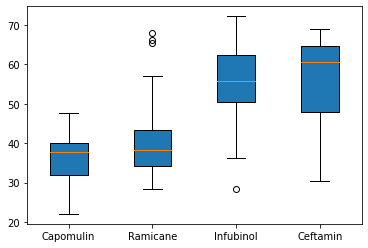

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_data=[value1,value2,value3,value4]
plt.boxplot(box_plot_data,patch_artist=True,labels=regimen_list)

plt.show()

## Line and Scatter Plots

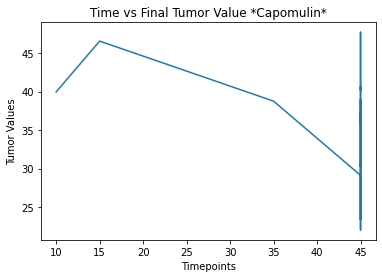

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_cap = final_tumor_df[final_tumor_df["Regimen"] == "Capomulin"]
line_plot_cap = line_plot_cap.sort_values(by='Timepoint')
tumor_values = list(line_plot_cap["Final Tumor"])
timepoints = list(line_plot_cap["Timepoint"])

plt.plot(timepoints,tumor_values)
plt.title('Time vs Final Tumor Value *Capomulin*')
plt.xlabel('Timepoints')
plt.ylabel('Tumor Values')
plt.show()
                    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


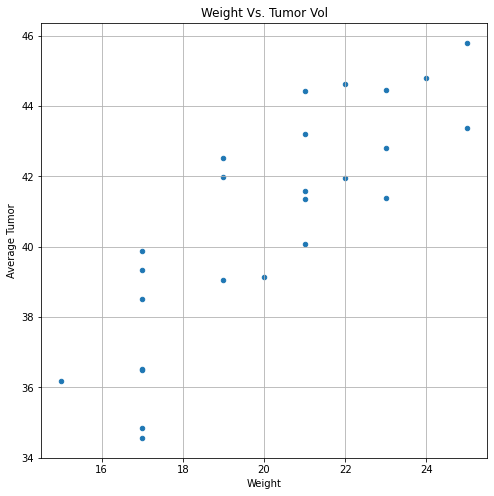

In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_id_list = []
mouse_weight_list = []
average_tumor_list = []
cap_df = merged_df[merged_df["Drug Regimen"] == "Capomulin"]
display(cap_df)
unique_mice = cap_df["Mouse ID"].unique()
for d in range(len(unique_mice)):
    mouse_id = str(unique_mice[d])
    mouse_df = cap_df[cap_df["Mouse ID"] == str(mouse_id)]
    mouse_weight = mouse_df["Weight (g)"].mean()
    average_tumor = mouse_df["Tumor Volume (mm3)"].mean()
    
    mouse_id_list.append(mouse_id)
    mouse_weight_list.append(mouse_weight)
    average_tumor_list.append(average_tumor)

columns = ["Mouse ID", "Weight", "Average Tumor"]
cap_final_df = pd.DataFrame(list(zip(mouse_id_list,mouse_weight_list,
                                      average_tumor_list)), columns = columns)
cap_final_df.plot(kind="scatter", x="Weight", y="Average Tumor", grid=True, figsize=(8,8),
              title="Weight Vs. Tumor Vol")
plt.show()

    
    
    
    
    

## Correlation and Regression

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = pd.Series(list(cap_final_df["Weight"]))
y = pd.Series(list(cap_final_df["Average Tumor"]))

display(x.corr(y)) 

0.8419363424694721